This is a tutorial for how to make polar plots. 

In [1]:
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt

import ml_storm_surge_operational.utils.helpers as hlp
from ml_storm_surge_operational.utils.eda import EDA
from ml_storm_surge_operational.data_loader.prepare_df import PrepareDataFrames 
from ml_storm_surge_operational.utils.correct_roms_using_radial_plots import CorrectROMS

Put the interpreter in UTC, to make sure no TZ issues...
Put the interpreter in UTC, to make sure no TZ issues...
Put the interpreter in UTC, to make sure no TZ issues...


In [2]:
%matplotlib inline

In [3]:
variables = [
    'obs', 'tide_py', 'roms', 'msl',# 'u10', 'v10', 'stormsurge_corrected', 
    'bias', 
    'wind_speed', 'wind_dir', 'roms - (obs - tide_py)', '(obs - tide_py)',
    '(roms - biasMET) - (obs - tide_py)', '(roms - biasMET)'
    ]
stations = ['NO_OSC']
datetime_start_hourly = dt.datetime(2001, 1, 1, 0, 0, 0, tzinfo=dt.timezone.utc)
datetime_end_hourly = dt.datetime(2019, 12, 31, 0, 0, 0, tzinfo=dt.timezone.utc)
roms_hind_var = '(roms - biasMET)'
roms_oper_var = 'stormsurge_corrected'
obs_var = '(obs - tide_py)'

# NORA3ERA5

In [4]:
prep = PrepareDataFrames(
    variables = variables,
    stations = stations,
    datetime_start_hourly = datetime_start_hourly,
    datetime_end_hourly = datetime_end_hourly,
    use_station_data = True,
    run_on_ppi = True,
    new_station_loc=True,
    era5_forcing=False,
    add_aux_variables=False,
    horizon=1
    )

In [5]:
forcingsforcingsdf = prep.prepare_features_labels_df()
print(df.columns)
print(df.head())

Preparing auxiliary DataFrame...
list_all_variables:  ['u10', 'roms', 'obs', 'tide_py', '(roms - biasMET)', 'v10', '(obs - tide_py)']
Generating obs and tide_py DataFrame...
Using already generated kyststasjoner file.
oper_df:                             tide_py_NO_OSC  obs_NO_OSC
2018-01-01 00:00:00+00:00            0.73        0.88
2018-01-01 01:00:00+00:00            0.78        0.92
2018-01-01 02:00:00+00:00            0.82        0.96
2018-01-01 03:00:00+00:00            0.85        0.93
2018-01-01 04:00:00+00:00            0.82        0.86
...                                   ...         ...
2019-12-30 20:00:00+00:00            0.80        1.15
2019-12-30 21:00:00+00:00            0.76        1.11
2019-12-30 22:00:00+00:00            0.70        1.03
2019-12-30 23:00:00+00:00            0.65        0.98
2019-12-31 00:00:00+00:00            0.60        0.92

[17221 rows x 2 columns]
Load all data to memory at initialization, this may take a few seconds...
crrt_df:                

In [6]:
data_dir = (
        '/lustre/storeB/users/paulinast'
        +'/backup_phd/polar_plots_operational'
        )

data_dir = 'rp_figs'

In [7]:
station = 'NO_OSC'

In [8]:
eda = EDA(station, data_dir, df)

In [9]:
fun = 'mean'
var1 = '(roms - biasMET)'# 'stormsurge_corrected'
var2 = '(obs - tide_py)' #'(obs_tide_py)'

In [10]:
sorted_df, aggregated_df, c, theta, rho = eda.radial_plot_data(
                 function_name=fun,  
                 var1=var1, 
                 var2=var2, 
                 radial_coord_name='wind_speed',  # swh
                 angular_coord_name='wind_dir',  # mwd
                 round_rho_val=1, 
                 round_theta_val=10
                 ) 

aggregated_df:                                             correctionRP_NO_OSC
wind_speed_bin_NO_OSC wind_dir_bin_NO_OSC                     
1.0                   -170.0                         -0.003183
                      -160.0                         -0.004687
                      -150.0                         -0.023573
                      -140.0                         -0.010403
                      -130.0                         -0.020672
...                                                        ...
8.0                    140.0                         -0.055241
9.0                   -100.0                         -0.045886
                      -90.0                          -0.061713
                      -80.0                           0.192546
                      -70.0                           0.033597

[251 rows x 1 columns]
aggregated_df_count:                                             count_NO_OSC
wind_speed_bin_NO_OSC wind_dir_bin_NO_OSC              
1.0    

In [11]:
path_rp = eda.make_radial_plot_path(
                 fun, 
                 station, 
                 roms_dataset='operational_arome_t0', 
                 var1=var1, 
                 var2=var2, 
                 polar_coordinates='wind'
                 )

In [12]:
abs_max = np.abs(np.max(np.nanquantile(c, 0.95)))
abs_min = np.abs(np.min(np.nanquantile(c, 0.05)))
vmax = max(abs_max, abs_min)
vmin = - vmax

c.shape:  (360, 9)
theta.shape:  (360, 9)
np.max(np.max(rho)):  8.5
rho[0, 0] - rho[0, 1]:  -1.0
Saving polar plots...
rp_figs/radial_plots/mean/roms-biasMET_obs-tide_py/radial_plot_wind/radial_plot_wind_operational_arome_t0_NO_OSC_mean_roms-biasMET_obs-tide_py_2001-01-01_2019-12-31.png


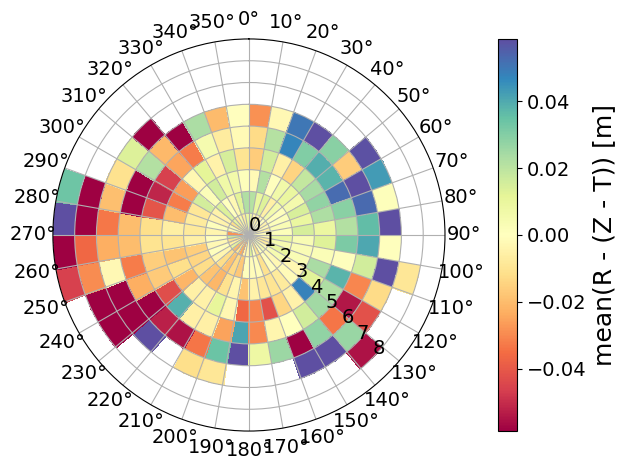

In [13]:
eda.radial_plot(
     c, 
     np.transpose(theta), 
     np.transpose(rho), 
     fun, 
     var1, 
     var2, 
     vmax=vmax,
     vmin=vmin,
     path=path_rp
)

## Coarser resolution

In [14]:
sorted_df, aggregated_df, c, theta, rho = eda.radial_plot_data(
                 function_name=fun,  
                 var1=var1, 
                 var2=var2, 
                 radial_coord_name='wind_speed',  # swh
                 angular_coord_name='wind_dir',  # mwd
                 min_obs_bin=3,
                 round_rho_val=2, 
                 round_theta_val=30
                 ) 

aggregated_df:                                             correctionRP_NO_OSC
wind_speed_bin_NO_OSC wind_dir_bin_NO_OSC                     
2.0                   -150.0                         -0.010527
                      -120.0                         -0.009557
                      -90.0                          -0.000918
                      -60.0                          -0.003421
                      -30.0                           0.000920
                      -0.0                            0.008046
                       30.0                           0.009295
                       60.0                           0.000228
                       90.0                           0.001123
                       120.0                          0.005012
                       150.0                          0.000632
                       180.0                         -0.004034
4.0                   -150.0                         -0.010057
                      -120.0           

In [15]:
path_rp = eda.make_radial_plot_path(
                 fun, 
                 station, 
                 roms_dataset='operational_arome_t0', 
                 var1=var1, 
                 var2=var2, 
                 polar_coordinates='wind'
                 )

In [16]:
abs_max = np.abs(np.max(np.nanquantile(c, 0.95)))
abs_min = np.abs(np.min(np.nanquantile(c, 0.05)))
vmax = max(abs_max, abs_min)
vmin = - vmax

c.shape:  (120, 5)
theta.shape:  (120, 5)
np.max(np.max(rho)):  9.0
rho[0, 0] - rho[0, 1]:  -2.0
Saving polar plots...
rp_figs/radial_plots/mean/roms-biasMET_obs-tide_py/radial_plot_wind/radial_plot_wind_operational_arome_t0_NO_OSC_mean_roms-biasMET_obs-tide_py_2001-01-01_2019-12-31.png


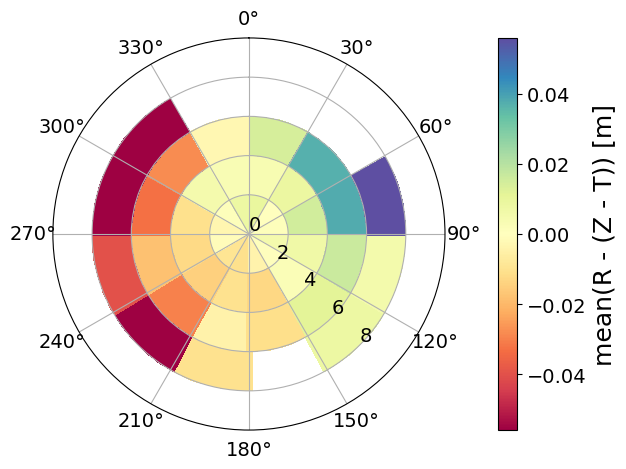

In [17]:
eda.radial_plot(
     c, 
     np.transpose(theta), 
     np.transpose(rho), 
     fun, 
     var1, 
     var2, 
     vmax=vmax,
     vmin=vmin,
     path=path_rp
)

In [19]:
sorted_df, aggregated_df, c, theta, rho = eda.radial_plot_data(
                 function_name=fun,  
                 var1=var1, 
                 var2=var2, 
                 radial_coord_name='wind_speed',  # swh
                 angular_coord_name='wind_dir',  # mwd
                 round_rho_val=1, 
                 round_theta_val=10,
                 min_obs_bin=5
                 ) 

aggregated_df:                                             correctionRP_NO_OSC
wind_speed_bin_NO_OSC wind_dir_bin_NO_OSC                     
1.0                   -170.0                         -0.003183
                      -160.0                         -0.004687
                      -150.0                         -0.023573
                      -140.0                         -0.010403
                      -130.0                         -0.020672
...                                                        ...
8.0                    140.0                         -0.055241
9.0                   -100.0                         -0.045886
                      -90.0                          -0.061713
                      -80.0                           0.192546
                      -70.0                           0.033597

[251 rows x 1 columns]
aggregated_df_count:                                             count_NO_OSC
wind_speed_bin_NO_OSC wind_dir_bin_NO_OSC              
1.0    

In [21]:
abs_max = np.abs(np.max(np.nanquantile(c, 0.95)))
abs_min = np.abs(np.min(np.nanquantile(c, 0.05)))
vmax = max(abs_max, abs_min)
vmin = - vmax

c.shape:  (360, 9)
theta.shape:  (360, 9)
np.max(np.max(rho)):  8.5
rho[0, 0] - rho[0, 1]:  -1.0
Saving polar plots...
rp_figs/radial_plots/mean/roms-biasMET_obs-tide_py/radial_plot_wind/radial_plot_wind_operational_arome_t0_NO_OSC_mean_roms-biasMET_obs-tide_py_2001-01-01_2019-12-31.png


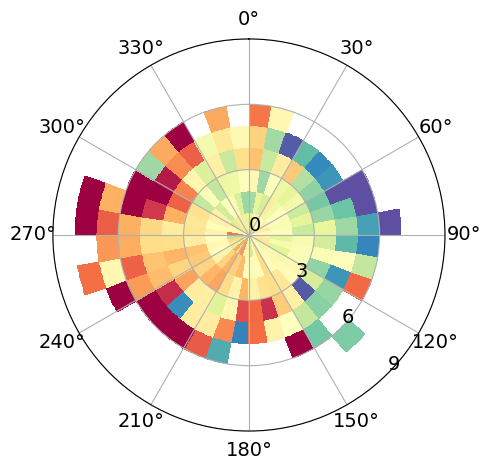

In [22]:
eda.radial_plot(
     c, 
     np.transpose(theta), 
     np.transpose(rho), 
     fun, 
     var1, 
     var2, 
     vmax=0.05, #vmax,
     vmin=-0.05, #vmin,
     path=path_rp,
     cbar_label='Average residuals [m]', 
     xticks=np.arange(0, 2*np.pi, np.radians(30)),
     yticks = np.arange(0, 10, 3),
     add_colorbar=False
)